# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# In'https://pypi.python.org/pypi/corporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Build partial query URL

url_query = f"{url}appid={weather_api_key}&units={units}&q="

#initialize lists
country =[]
cloudiness = []
humidity = []
date = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_list = []

print('Data Retrieval Start')
print('-------------')
counter = 1
nb_tries = 10 

#Loop through cities and request city data

for city in cities:
    city_data = url_query + city.replace(' ', '+')
    response = requests.get(city_data)
    print(f'Processing Record {counter} | {city}')
    print (city_data)
          
    try:
        response.raise_for_status()
        data = response.json()
#print (data) to check the key structure
        time.sleep(1)
        city_list.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])      
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])    
        wind_speed.append(data['wind']['speed']) 
    except requests. exceptions. HTTPError as e:
        print ('No such city. skipping....')
        print (str(e))
    except ConnectionError as err:
        if  nb_tries == 0:
            raise err
        else:
            time.sleep(1)
    counter +=1
    nb_tries -=1
          
print ('------------')
print ('Data Retrieval Complete')          


           
          
        


Data Retrieval Start
-------------
Processing Record 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=rikitea
Processing Record 2 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=guerrero+negro
Processing Record 3 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=tumannyy
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=tumannyy
Processing Record 4 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=avarua
Processing Record 5 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=norman+wells
Processing Record 6 | liberal
http://api.openweathermap.org/data/2.5/wea

Processing Record 52 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=grand+river+south+east
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=grand+river+south+east
Processing Record 53 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=ahipara
Processing Record 54 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=rungata
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=rungata
Processing Record 55 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=salalah
Processing Record 56 | vaitupu
http://api.openwea

Processing Record 101 | itoman
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=itoman
Processing Record 102 | at-bashi
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=at-bashi
Processing Record 103 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=butaritari
Processing Record 104 | riyadh
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=riyadh
Processing Record 105 | rio cauto
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=rio+cauto
Processing Record 106 | east london
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=east+london
Processing Record 107 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=la

Processing Record 155 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=codrington
Processing Record 156 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=jalu
Processing Record 157 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=fairbanks
Processing Record 158 | onega
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=onega
Processing Record 159 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=yellowknife
Processing Record 160 | kurumkan
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=kurumkan
Processing Record 161 | manjacaze
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=manjacaze

Processing Record 209 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=beloha
Processing Record 210 | sorkjosen
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sorkjosen
Processing Record 211 | akdagmadeni
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=akdagmadeni
Processing Record 212 | kyabe
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=kyabe
Processing Record 213 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sinnamary
Processing Record 214 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sao+filipe
Processing Record 215 | maneadero
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=man

Processing Record 263 | samokov
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=samokov
Processing Record 264 | pitea
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=pitea
Processing Record 265 | airai
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=airai
Processing Record 266 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=yumen
Processing Record 267 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bosaso
Processing Record 268 | kushiro
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=kushiro
Processing Record 269 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=olafsvik
Processing Record 270 | b

Processing Record 315 | lokosovo
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=lokosovo
Processing Record 316 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=atbasar
Processing Record 317 | bojnurd
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bojnurd
Processing Record 318 | rosarito
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=rosarito
Processing Record 319 | warsaw
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=warsaw
Processing Record 320 | bagasara
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bagasara
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&

Processing Record 368 | bereda
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bereda
Processing Record 369 | vojens
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=vojens
Processing Record 370 | gainesville
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=gainesville
Processing Record 371 | nerchinsk
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=nerchinsk
Processing Record 372 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=ust-kuyga
Processing Record 373 | araouane
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=araouane
Processing Record 374 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=nano

Processing Record 420 | perugia
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=perugia
Processing Record 421 | xuddur
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=xuddur
Processing Record 422 | krutinka
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=krutinka
Processing Record 423 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=maldonado
Processing Record 424 | nueva concepcion
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=nueva+concepcion
Processing Record 425 | sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sobolevo
Processing Record 426 | shieli
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&

Processing Record 474 | satun
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=satun
Processing Record 475 | kutum
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=kutum
Processing Record 476 | zlatoustovsk
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=zlatoustovsk
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=zlatoustovsk
Processing Record 477 | north myrtle beach
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=north+myrtle+beach
Processing Record 478 | omboue
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=omboue
Processing Record 479 | kazanskoye
http://api.openweathermap.org/data/2.5/weather?appid=05c1723

Processing Record 525 | xinzhi
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=xinzhi
Processing Record 526 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=buchanan
Processing Record 527 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=alice+springs
Processing Record 528 | khonsa
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=khonsa
Processing Record 529 | sandwick
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sandwick
Processing Record 530 | maloshuyka
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=maloshuyka
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe

Processing Record 577 | knoxville
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=knoxville
Processing Record 578 | murgab
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=murgab
Processing Record 579 | trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=trincomalee
Processing Record 580 | morondava
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=morondava
Processing Record 581 | dujuma
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=dujuma
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=dujuma
Processing Record 582 | ngunguru
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc86

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

#create panda dataframe for new data
city_dictionary = pd.DataFrame({'Country':country,
                 'Cloudiness':cloudiness,
                 'Humidity':humidity,
                 'Date':date,
                 'Latitude':lat,
                 'Longitude':lng,
                 'Max Temp': max_temp,
                 'Wind Speed':wind_speed,
                 'City':city_list})
#export city data into csv
city_dictionary.to_csv('city_data.csv')
#count dictionary
city_dictionary.count()

Country       558
Cloudiness    558
Humidity      558
Date          558
Latitude      558
Longitude     558
Max Temp      558
Wind Speed    558
City          558
dtype: int64

In [7]:
#Display Data Frame
city_dictionary 

,Country,Cloudiness,Humidity,Date,Latitude,Longitude,Max Temp,Wind Speed,City
0,PF,1,71,1616429119,-23.1203,-134.9692,26.57,3.23,rikitea
1,MX,1,55,1616429165,27.9769,-114.0611,15.50,4.93,guerrero negro
2,CK,75,89,1616429188,-21.2078,-159.7750,26.00,2.06,avarua
3,CA,40,75,1616428677,65.2820,-126.8329,-33.00,0.47,norman wells
4,US,90,100,1616429191,37.0431,-100.9210,6.00,5.14,liberal
...,...,...,...,...,...,...,...,...,...
553,GW,58,50,1616429996,11.2833,-15.8333,25.34,4.91,bubaque
554,AU,90,94,1616429715,-21.1500,149.2000,25.00,0.51,mackay
555,CG,40,66,1616429999,-4.7561,11.8578,30.00,3.70,loandjili
556,SV,0,44,1616429834,13.5928,-89.8275,28.00,1.54,acajutla


In [8]:
city_dictionary.describe()

,Cloudiness,Humidity,Date,Latitude,Longitude,Max Temp,Wind Speed
count,558.000000,558.000000,5.580000e+02,558.000000,558.000000,558.000000,558.000000
mean,50.177419,68.491039,1.616430e+09,22.368709,18.037318,12.751523,3.719624
std,38.217873,22.511655,2.516952e+02,33.289699,91.520120,15.955378,2.521946
min,0.000000,7.000000,1.616429e+09,-54.800000,-179.166700,-34.120000,0.090000
25%,6.250000,55.000000,1.616429e+09,-4.219575,-65.626050,3.007500,1.842500
50%,51.500000,72.000000,1.616430e+09,29.033500,25.892050,17.000000,3.090000
75%,90.000000,86.000000,1.616430e+09,50.030675,100.251550,25.995000,5.140000
max,100.000000,100.000000,1.616430e+09,78.218600,176.633300,41.450000,18.040000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

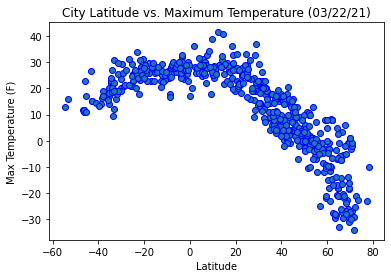

In [9]:
plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Max Temp'],
            edgecolor= 'blue', linewidths=1, marker='o',
            alpha =1.0, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Maximum Temperature (%s)'
          % time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')


#save as .png
plt.savefig('Latitude vs Temperature (F).png')

## Latitude vs. Humidity Plot



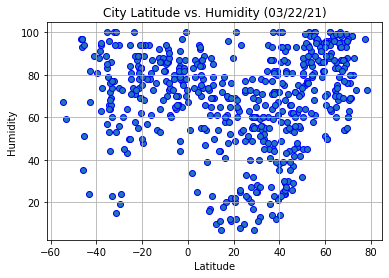

In [10]:
#Latitude vs. Humidity

plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Humidity'],
            edgecolor= 'blue', linewidths=1, marker='o',
            alpha =1.0, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Humidity (%s)'
          % time.strftime("%x"))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#save as .png
plt.savefig('Latitude vs Humidity.png')

## Latitude vs. Cloudiness Plot

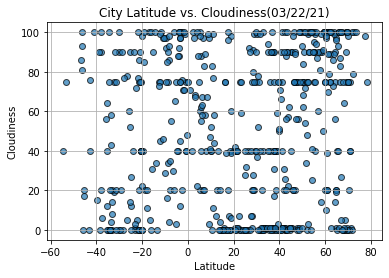

In [11]:
plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Cloudiness'],
            edgecolor='black', linewidths=1, marker='o',
            alpha =0.7, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Cloudiness(%s)'
          % time.strftime("%x"))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

#save as .png
plt.savefig('Latitude vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

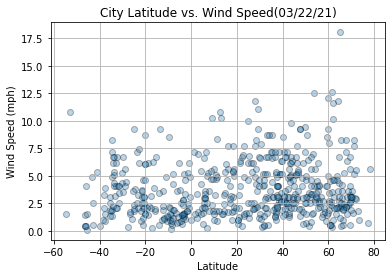

In [12]:
plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Wind Speed'],
            edgecolor='black', linewidths=1, marker='o',
            alpha =0.3, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Wind Speed(%s)'
          % time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save as .png
plt.savefig('Latitude vs Wind Speed.png')

## Linear Regression

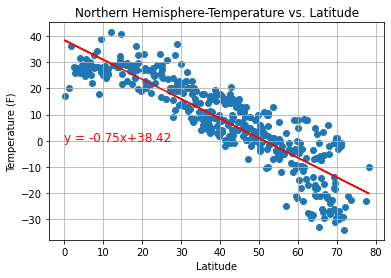

<Figure size 432x288 with 0 Axes>

In [44]:
# Create Northern/Southern Hemisphere DataFrame
hemi_df = city_dictionary['Latitude']>0
n_hemi = city_dictionary[hemi_df]
s_hemi = city_dictionary[~hemi_df]

x_plots = n_hemi['Latitude']
y_plots = n_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)

plt.scatter(x_plots,y_plots)
plt. title('Northern Hemisphere-Temperature vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (0,0), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()
plt.savefig('lat_vs_temp_regression.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

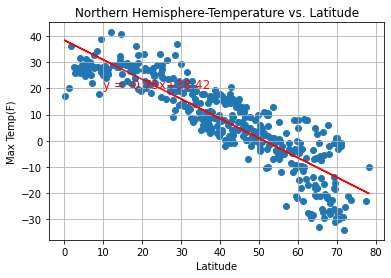

<Figure size 432x288 with 0 Axes>

In [46]:
# Create Northern/Southern Hemisphere DataFrame
hemi_df = city_dictionary['Latitude']>0
n_hemi = city_dictionary[hemi_df]
s_hemi = city_dictionary[~hemi_df]

x_plots = n_hemi['Latitude']
y_plots = n_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)

plt.scatter(x_plots,y_plots)
plt. title('Northern Hemisphere-Temperature vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (10,20), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.grid(True)
plt.show()
plt.savefig('lat_vs_temp_regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

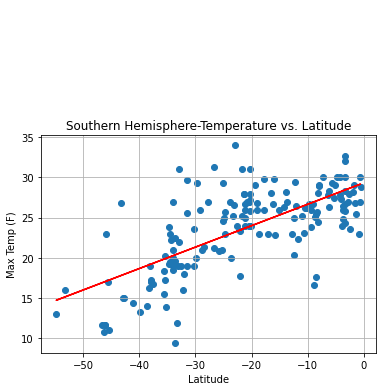

<Figure size 432x288 with 0 Axes>

In [47]:
x_plots = s_hemi['Latitude']
y_plots = s_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)

plt.scatter(x_plots,y_plots)
plt. title('Southern Hemisphere-Temperature vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (-35,50), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(True)
plt.show()
plt.savefig('sh_lat_vs_temp_regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

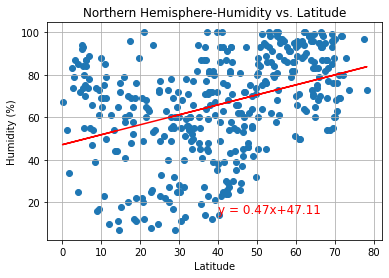

<Figure size 432x288 with 0 Axes>

In [50]:
x_plots = n_hemi['Latitude']
y_plots = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)
plt.scatter(x_plots,y_plots)
plt. title('Northern Hemisphere-Humidity vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (40, 15), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
plt.savefig('nh_lat_vs_humid_regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

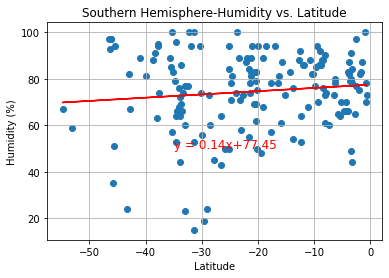

<Figure size 432x288 with 0 Axes>

In [52]:
x_plots = s_hemi['Latitude']
y_plots = s_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)
plt.scatter(x_plots,y_plots)
plt. title('Southern Hemisphere-Humidity vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (-35,50), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
plt.savefig('sh_lat_vs_humid_regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

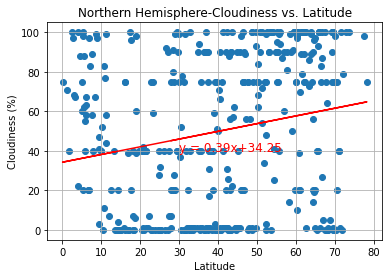

<Figure size 432x288 with 0 Axes>

In [53]:
x_plots = n_hemi['Latitude']
y_plots = n_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)
plt.scatter(x_plots,y_plots)
plt. title('Northern Hemisphere-Cloudiness vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (30,40), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()
plt.savefig('nh_lat_vs_cloudiness_regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

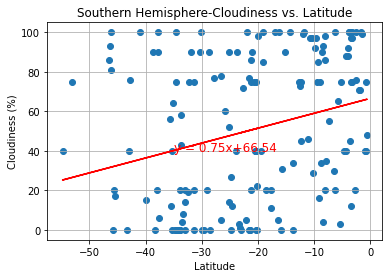

<Figure size 432x288 with 0 Axes>

In [54]:
x_plots = s_hemi['Latitude']
y_plots = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)
plt.scatter(x_plots,y_plots)
plt. title('Southern Hemisphere-Cloudiness vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (-35,40), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()
plt.savefig('sh_lat_vs_cloudiness_regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

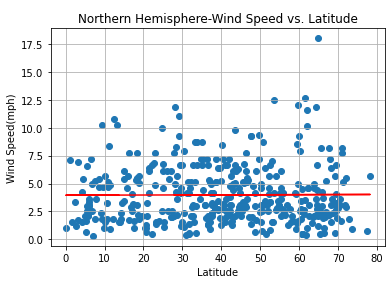

<Figure size 432x288 with 0 Axes>

In [55]:
x_plots = n_hemi['Latitude']
y_plots = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)
plt.scatter(x_plots,y_plots)
plt. title('Northern Hemisphere-Wind Speed vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (40,20), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(True)
plt.show()
plt.savefig('nh_lat_wind_speed_regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

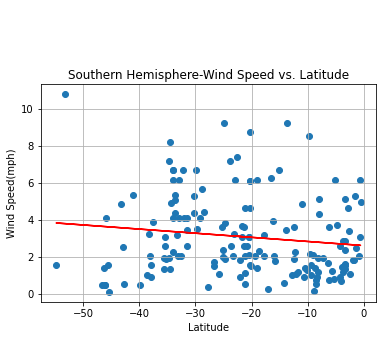

<Figure size 432x288 with 0 Axes>

In [56]:
x_plots = s_hemi['Latitude']
y_plots = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plots, y_plots)
regression_values = x_plots *slope + intercept
equation = 'y = ' +str(round(slope, 2)) + 'x+'+str(round(intercept, 2))
relationship = st.pearsonr(x_plots, y_plots)
plt.scatter(x_plots,y_plots)
plt. title('Southern Hemisphere-Wind Speed vs. Latitude')
plt.plot(x_plots, regression_values, 'r-')
plt.annotate (equation, (-30,15), fontsize = 12, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(True)
plt.show()
plt.savefig('sh_lat_wind_speed_regression.png')